In [1]:
import numpy as np

In [32]:
def single_bandit(n_arm, q_true, q_est, epsilon, steps):
	act_counts = np.zeros(n_arm)
	rewards = list()
	opt_act = np.argmax(q_true)
	opt_acts = list()
	for i in range(steps):
		if np.random.rand() < epsilon:
			a = np.random.choice(n_arm)
		else:
			a = np.argmax(q_est)
		act_counts[a] += 1
		reward = q_true[a] + np.random.randn()
		rewards.append(reward)
		opt_acts.append(int(a == opt_act))
		q_est[a] += (1 / act_counts[a]) * (reward - q_est[a])
	return rewards, opt_acts

In [39]:
n_arm = 10
q_true = np.random.randn(n_arm)
q_est = np.zeros(n_arm)
epsilon = 0.0

In [42]:
x = [single_bandit(n_arm, np.random.randn(n_arm), q_est, 0.01, 1000) for i in range(2000)]

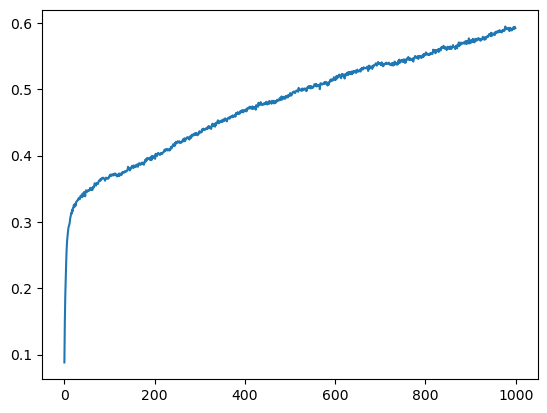

In [43]:
t = list(zip(*x))
tt = np.mean(t[1], axis=0)

import matplotlib.pyplot as plt
plt.plot(tt)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
for epsilon in [0.0, 0.01, 0.1]:
	# q_true = np.random.randn(n_arm)
	x = [single_bandit(n_arm, np.random.randn(n_arm), q_est, epsilon, 1000) for i in range(2000)]
	t = np.array(list(zip(*x)))[0].mean(axis=0)
	plt.plot(t)
plt.xlim(0, 1000)
plt.ylim(0, 1.6)
plt.show()